In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from prophet import Prophet

In [2]:
# Load the dataset into Pandas dataframe
coal_power_df = pd.read_csv("resources/coal_power_vs_ev_emissions_with_difference.csv")

In [3]:
coal_power_df.head()

,Country,Year,Coal Power Emissions (metric tons CO2),Number of EVs,Emissions Saved per EV (metric tons CO2/year),Total Emissions Saved by EVs (metric tons CO2),Difference (Coal Emissions - EV Savings) (metric tons CO2)
0,China,2020,7900000000,5000000,4.6,23000000,7877000000
1,India,2020,2500000000,1500000,4.6,6900000,2493100000
2,United States,2020,1200000000,1700000,4.6,7820000,1192180000
3,China,2019,7800000000,3500000,4.6,16100000,7783900000
4,China,2021,8000000000,7000000,4.6,32200000,7967800000


In [4]:
# Convert relevant columns to millions
coal_power_df["Coal Power Emissions (millions metric tons CO2)"] = coal_power_df["Coal Power Emissions (metric tons CO2)"] / 1_000_000
coal_power_df["Total Emissions Saved by EVs (millions metric tons CO2)"] = coal_power_df["Total Emissions Saved by EVs (metric tons CO2)"] / 1_000_000
coal_power_df["Difference (Coal Emissions - EV Savings) (millions metric tons CO2)"] = coal_power_df["Difference (Coal Emissions - EV Savings) (metric tons CO2)"] / 1_000_000

# Drop the original columns
coal_power_df = coal_power_df.drop(columns=[
    "Coal Power Emissions (metric tons CO2)",
    "Total Emissions Saved by EVs (metric tons CO2)",
    "Difference (Coal Emissions - EV Savings) (metric tons CO2)"
])

# Reorder columns if necessary
coal_power_df = coal_power_df[[
    "Country", "Year",
    "Coal Power Emissions (millions metric tons CO2)",
    "Number of EVs",
    "Emissions Saved per EV (metric tons CO2/year)",
    "Total Emissions Saved by EVs (millions metric tons CO2)",
    "Difference (Coal Emissions - EV Savings) (millions metric tons CO2)"
]]

In [5]:
coal_power_df

,Country,Year,Coal Power Emissions (millions metric tons CO2),Number of EVs,Emissions Saved per EV (metric tons CO2/year),Total Emissions Saved by EVs (millions metric tons CO2),Difference (Coal Emissions - EV Savings) (millions metric tons CO2)
0,China,2020,7900.0,5000000,4.6,23.00,7877.00
1,India,2020,2500.0,1500000,4.6,6.90,2493.10
2,United States,2020,1200.0,1700000,4.6,7.82,1192.18
3,China,2019,7800.0,3500000,4.6,16.10,7783.90
4,China,2021,8000.0,7000000,4.6,32.20,7967.80
5,India,2019,2400.0,1000000,4.6,4.60,2395.40
6,India,2021,2600.0,2000000,4.6,9.20,2590.80
7,United States,2019,1300.0,1200000,4.6,5.52,1294.48
8,United States,2021,1100.0,2000000,4.6,9.20,1090.80


In [6]:
# Sort the DataFrame by the "Year" column
coal_power_df = coal_power_df.sort_values(by="Year")
coal_power_df.head()

,Country,Year,Coal Power Emissions (millions metric tons CO2),Number of EVs,Emissions Saved per EV (metric tons CO2/year),Total Emissions Saved by EVs (millions metric tons CO2),Difference (Coal Emissions - EV Savings) (millions metric tons CO2)
3,China,2019,7800.0,3500000,4.6,16.10,7783.90
5,India,2019,2400.0,1000000,4.6,4.60,2395.40
7,United States,2019,1300.0,1200000,4.6,5.52,1294.48
0,China,2020,7900.0,5000000,4.6,23.00,7877.00
1,India,2020,2500.0,1500000,4.6,6.90,2493.10


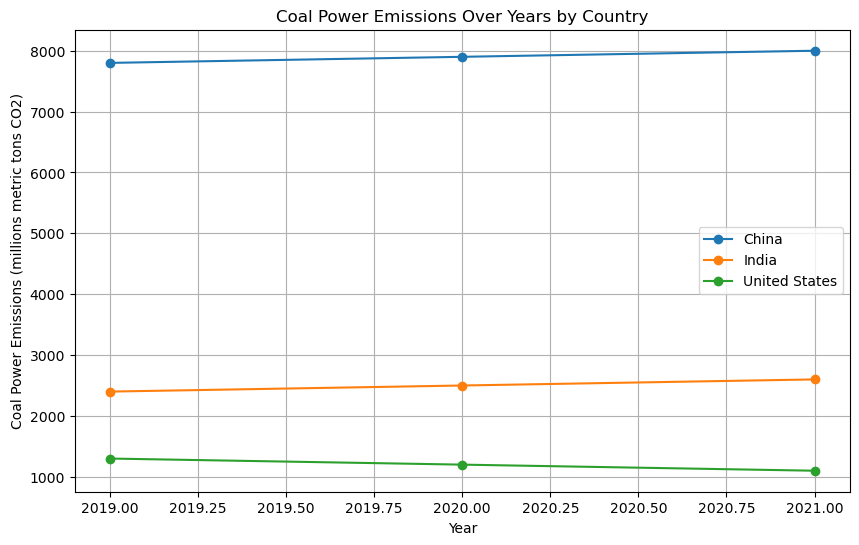

In [7]:
# Line plot for coal power emissions over the years for each country
plt.figure(figsize=(10, 6))
for country in coal_power_df['Country'].unique():
    country_data = coal_power_df[coal_power_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Coal Power Emissions (millions metric tons CO2)'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Coal Power Emissions (millions metric tons CO2)')
plt.title('Coal Power Emissions Over Years by Country')
plt.legend()
plt.grid(True)
plt.show()

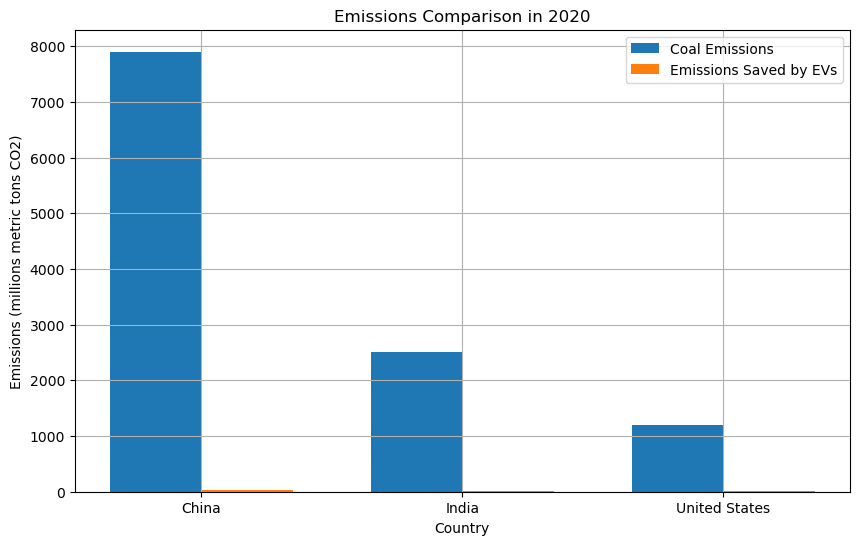

In [8]:
# Bar plot for a specific year to compare emissions and savings
year = 2020  # Example year
year_data = coal_power_df[coal_power_df['Year'] == year]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(year_data))

plt.bar(index, year_data['Coal Power Emissions (millions metric tons CO2)'], bar_width, label='Coal Emissions')
plt.bar([i + bar_width for i in index], year_data['Total Emissions Saved by EVs (millions metric tons CO2)'], bar_width, label='Emissions Saved by EVs')

plt.xlabel('Country')
plt.ylabel('Emissions (millions metric tons CO2)')
plt.title(f'Emissions Comparison in {year}')
plt.xticks([i + bar_width / 2 for i in index], year_data['Country'])
plt.legend()
plt.grid(True)
plt.show()

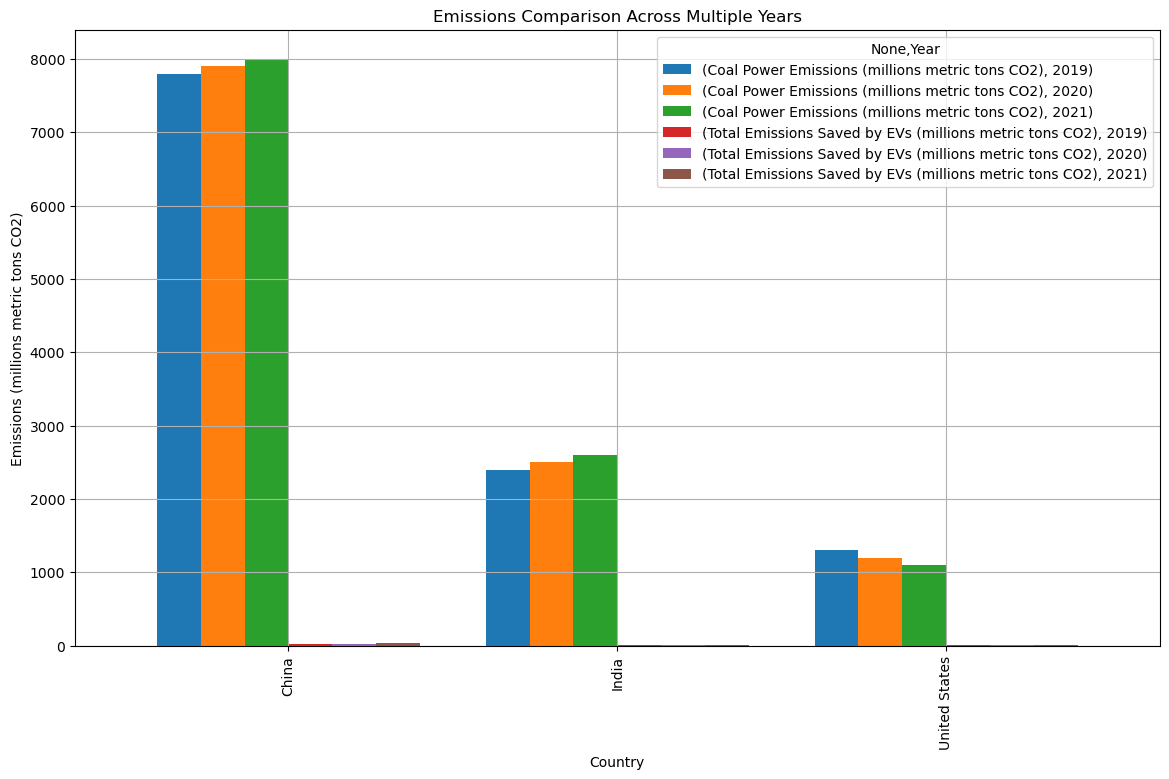

In [9]:
pivot_df = coal_power_df.pivot(index='Country', columns='Year', values=['Coal Power Emissions (millions metric tons CO2)', 'Total Emissions Saved by EVs (millions metric tons CO2)'])

# Plot the data
pivot_df.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Emissions Comparison Across Multiple Years')
plt.xlabel('Country')
plt.ylabel('Emissions (millions metric tons CO2)')
plt.grid(True)
plt.show()

In [ ]:
pivot_df = coal_power_df.pivot(index='Country', columns='Year', values=['Coal Power Emissions (millions metric tons CO2)', 'Total Emissions Saved by EVs (millions metric tons CO2)'])

# Plot the data
pivot_df.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Emissions Comparison Across Multiple Years')
plt.xlabel('Country')
plt.ylabel('Emissions (millions metric tons CO2)')
plt.grid(True)
plt.show()

In [10]:
# Prepare data for Prophet
coal_power_df['ds'] = pd.to_datetime(coal_power_df['Year'], format='%Y')
df_china_ev = coal_power_df[coal_power_df['Country'] == 'China'][['ds', 'Total Emissions Saved by EVs (millions metric tons CO2)']]
df_china_ev.columns = ['ds', 'y']

In [11]:
# Initialize the model
model_china_ev = Prophet()

# Fit the model
model_china_ev.fit(df_china_ev)

20:06:55 - cmdstanpy - INFO - Chain [1] start processing
20:06:55 - cmdstanpy - INFO - Chain [1] done processing


/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


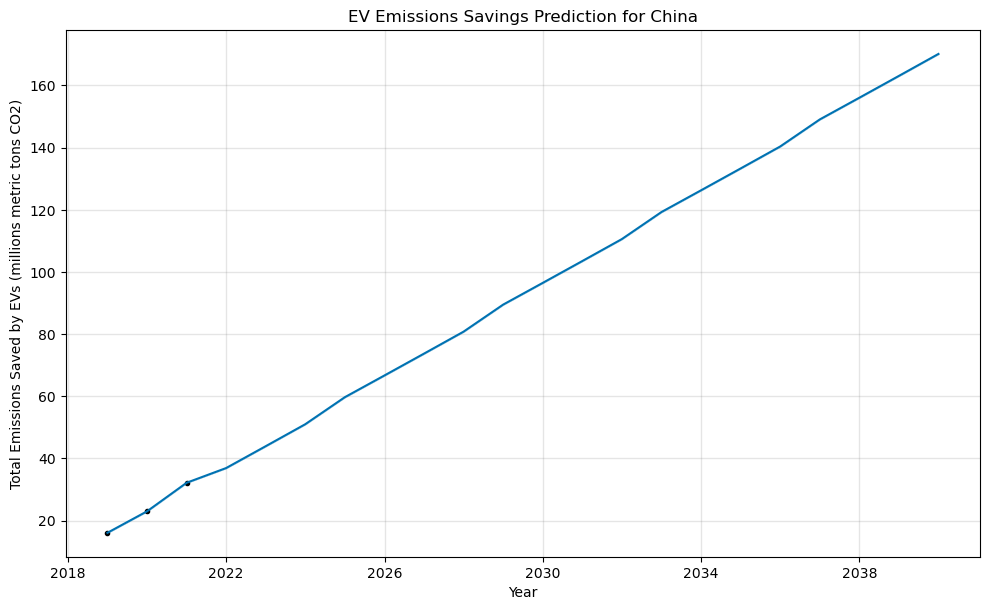

In [12]:
# Create a DataFrame with future dates until 2040
future_china_ev = model_china_ev.make_future_dataframe(periods=19, freq='Y')

# Make predictions
forecast_china_ev = model_china_ev.predict(future_china_ev)

# Plot the forecast
model_china_ev.plot(forecast_china_ev)
plt.title('EV Emissions Savings Prediction for China')
plt.xlabel('Year')
plt.ylabel('Total Emissions Saved by EVs (millions metric tons CO2)')
plt.show()

In [13]:
# Prepare data for Prophet
coal_power_df['ds'] = pd.to_datetime(coal_power_df['Year'], format='%Y')
df_china = coal_power_df[coal_power_df['Country'] == 'China'][['ds', 'Coal Power Emissions (millions metric tons CO2)']]
df_china.columns = ['ds', 'y']

In [14]:
# Initialize the model
model = Prophet()

# Fit the model
model.fit(df_china)

20:07:16 - cmdstanpy - INFO - Chain [1] start processing
20:07:16 - cmdstanpy - INFO - Chain [1] done processing


/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


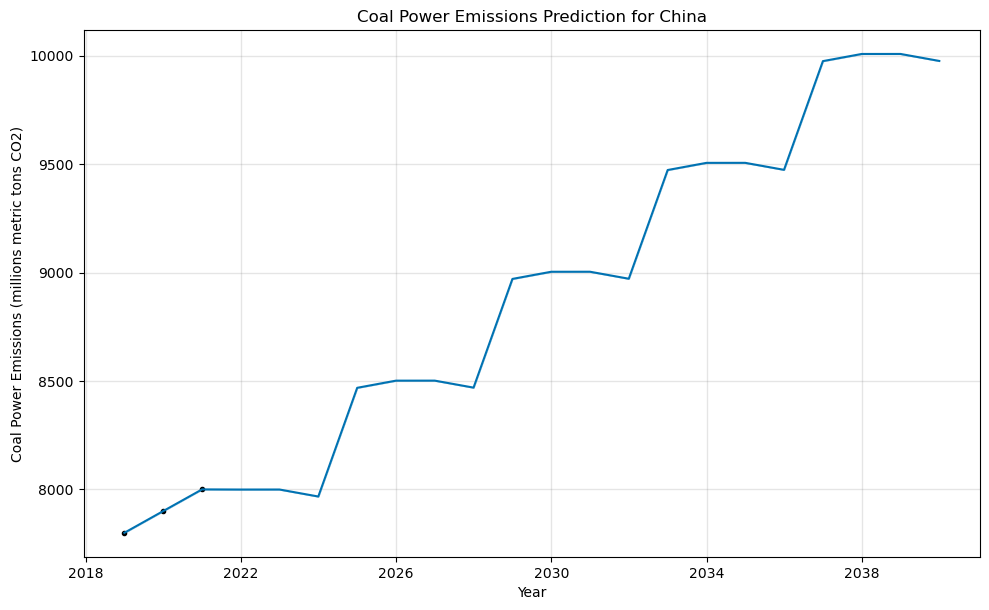

In [15]:
# Create a DataFrame with future dates until 2040
future = model.make_future_dataframe(periods=19, freq='Y')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Coal Power Emissions Prediction for China')
plt.xlabel('Year')
plt.ylabel('Coal Power Emissions (millions metric tons CO2)')
plt.show()

In [17]:
# Prepare data for Prophet
coal_power_df['ds'] = pd.to_datetime(coal_power_df['Year'], format='%Y')
df_india = coal_power_df[coal_power_df['Country'] == 'India'][['ds', 'Coal Power Emissions (millions metric tons CO2)']]
df_india.columns = ['ds', 'y']

In [18]:
# Initialize the model
india_model = Prophet()

# Fit the model
india_model.fit(df_india)

20:29:30 - cmdstanpy - INFO - Chain [1] start processing
20:29:30 - cmdstanpy - INFO - Chain [1] done processing


/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


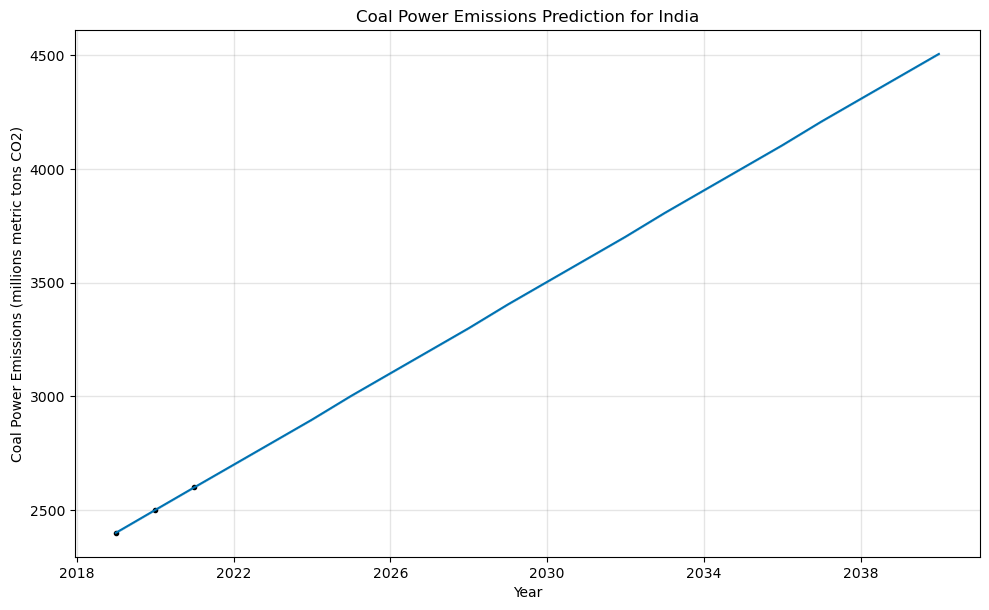

In [19]:
# Create a DataFrame with future dates until 2040
future_india = india_model.make_future_dataframe(periods=19, freq='Y')

# Make predictions
forecast_india = india_model.predict(future_india)

# Plot the forecast
india_model.plot(forecast_india)
plt.title('Coal Power Emissions Prediction for India')
plt.xlabel('Year')
plt.ylabel('Coal Power Emissions (millions metric tons CO2)')
plt.show()

In [20]:
# forecast_india

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,532.217400,2399.995220,2399.995220,532.217400,532.217400,1867.777820,1867.777820,1867.777820,1867.777820,1867.777820,1867.777820,0.0,0.0,0.0,2399.995220
1,2020-01-01,632.693132,2499.995285,2499.995285,632.693132,632.693132,1867.302153,1867.302153,1867.302153,1867.302153,1867.302153,1867.302153,0.0,0.0,0.0,2499.995285
2,2021-01-01,733.444141,2599.994940,2599.994940,733.444141,733.444141,1866.550799,1866.550799,1866.550799,1866.550799,1866.550799,1866.550799,0.0,0.0,0.0,2599.994940
3,2021-12-31,833.644597,2698.728491,2698.728504,833.644591,833.644604,1865.083901,1865.083901,1865.083901,1865.083901,1865.083901,1865.083901,0.0,0.0,0.0,2698.728498
4,2022-12-31,934.120330,2797.824550,2797.824593,934.120307,934.120350,1863.704243,1863.704243,1863.704243,1863.704243,1863.704243,1863.704243,0.0,0.0,0.0,2797.824573
5,2023-12-31,1034.596062,2896.979518,2896.979605,1034.596018,1034.596105,1862.383500,1862.383500,1862.383500,1862.383500,1862.383500,1862.383500,0.0,0.0,0.0,2896.979563
6,2024-12-31,1135.347071,3001.690496,3001.690644,1135.346997,1135.347145,1866.343499,1866.343499,1866.343499,1866.343499,1866.343499,1866.343499,0.0,0.0,0.0,3001.690570
7,2025-12-31,1235.822803,3100.906597,3100.906809,1235.822696,1235.822908,1865.083901,1865.083901,1865.083901,1865.083901,1865.083901,1865.083901,0.0,0.0,0.0,3100.906704
8,2026-12-31,1336.298536,3200.002637,3200.002909,1336.298394,1336.298666,1863.704243,1863.704243,1863.704243,1863.704243,1863.704243,1863.704243,0.0,0.0,0.0,3200.002779
9,2027-12-31,1436.774268,3299.157594,3299.157936,1436.774094,1436.774436,1862.383500,1862.383500,1862.383500,1862.383500,1862.383500,1862.383500,0.0,0.0,0.0,3299.157769


In [35]:
# Prepare data for Prophet
coal_power_df['ds'] = pd.to_datetime(coal_power_df['Year'], format='%Y')
df_us = coal_power_df[coal_power_df['Country'] == 'United States'][['ds', 'Coal Power Emissions (millions metric tons CO2)']]
df_us.columns = ['ds', 'y']
df_country['floor'] = 0

In [36]:
# Initialize the model
us_model = Prophet()

# Fit the model
us_model.fit(df_us)

18:46:31 - cmdstanpy - INFO - Chain [1] start processing
18:46:31 - cmdstanpy - INFO - Chain [1] done processing


/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


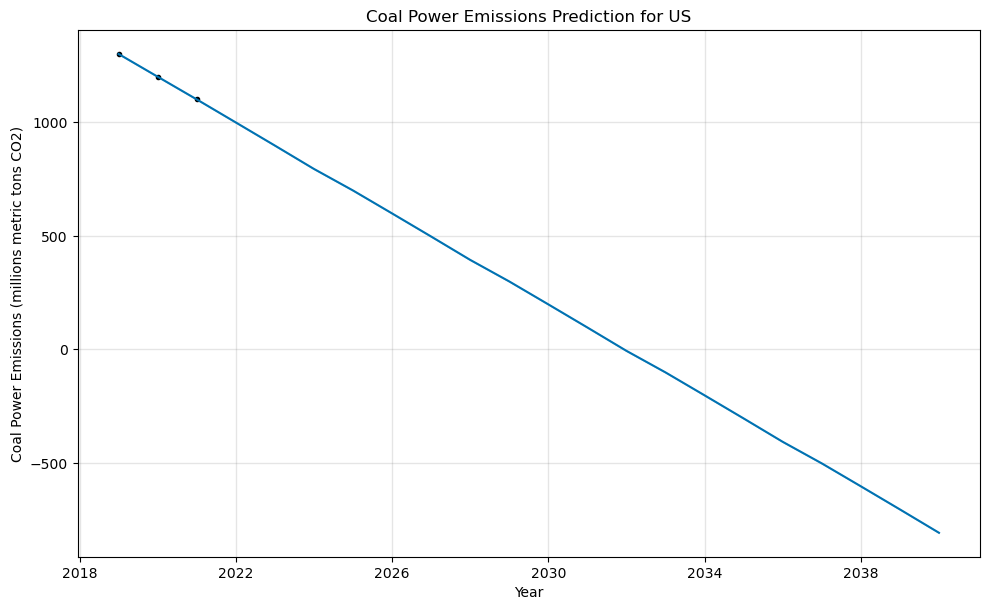

In [37]:
# Create a DataFrame with future dates until 2040
future = us_model.make_future_dataframe(periods=19, freq='Y')

# Make predictions
forecast = us_model.predict(future)

# Plot the forecast
us_model.plot(forecast)
plt.title('Coal Power Emissions Prediction for US')
plt.xlabel('Year')
plt.ylabel('Coal Power Emissions (millions metric tons CO2)')
plt.show()

In [45]:
# Filter for the United States data
df_us_updated = coal_power_df[coal_power_df['Country'] == 'United States'][['ds', 'Coal Power Emissions (millions metric tons CO2)']]
df_us_updated.columns = ['ds', 'y']

# Add cap and floor for logistic growth model
df_us_updated['cap'] = 1200  # Set an appropriate cap based on domain knowledge
df_us_updated['floor'] = 0   # Ensure the forecast does not go below zero

# Initialize the model with logistic growth
model = Prophet(growth='logistic')

# Fit the model
model.fit(df_us_updated)

20:06:12 - cmdstanpy - INFO - Chain [1] start processing
20:06:14 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
# Create a DataFrame with future dates until 2040
future_us = model.make_future_dataframe(periods=19, freq='Y')
# future_us['cap'] = 1200
future_us['floor'] = 0

# Make predictions
forecast_us = model.predict(future_us)

ValueError: Capacities must be supplied for logistic growth in column "cap"

/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


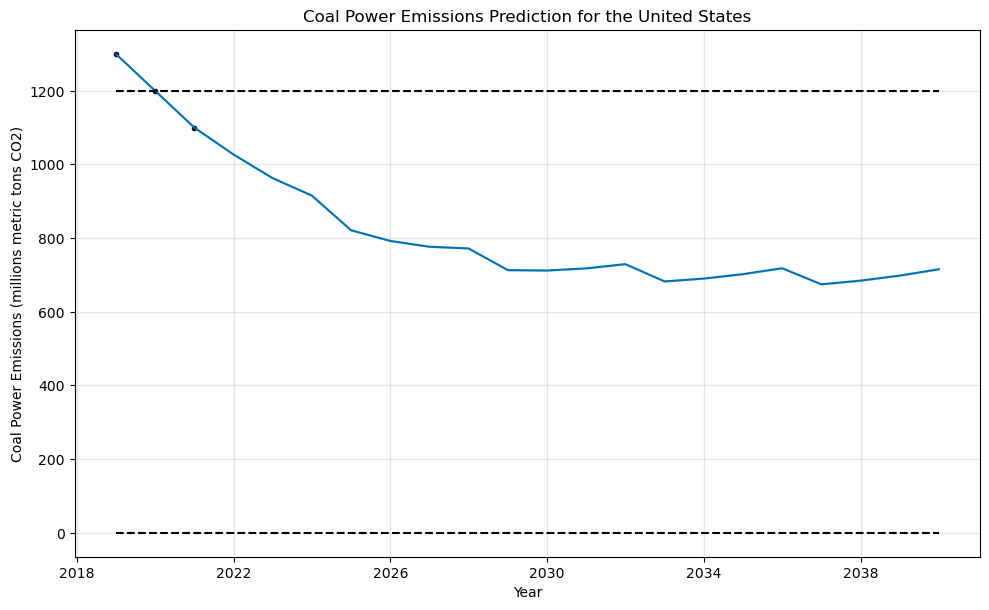

In [41]:
# Plot the forecast
fig = model.plot(forecast_us)
plt.title('Coal Power Emissions Prediction for the United States')
plt.xlabel('Year')
plt.ylabel('Coal Power Emissions (millions metric tons CO2)')
plt.show()